# **Sentimen Analisis Review APK Ruang Guru**


# **Import Library**

In [1]:
!pip install google-play-scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 1.7 MB/s eta 0:00:00


In [2]:
# Mengimpor pustaka google_play_scraper untuk mengakses ulasan dan informasi aplikasi dari Google Play Store.
from google_play_scraper import app, reviews, Sort, reviews_all

In [3]:
# Pandas untuk manipulasi dan analisis data
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

# Mengatur seed untuk reproduktibilitas
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns

# Modul untuk bekerja dengan ekspresi reguler, tanda baca, tokenisasi dan kata berhenti
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Stemming (penghilangan imbuhan kata) dalam bahasa Indonesia
!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Membuat visualisasi berbentuk awan kata (word cloud) dari teks
from wordcloud import WordCloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [4]:
import nltk  # Import pustaka NLTK (Natural Language Toolkit).
nltk.download('punkt_tab')  # Mengunduh dataset yang diperlukan untuk tokenisasi teks.
nltk.download('stopwords')  # Mengunduh dataset yang berisi daftar kata-kata berhenti (stop words) dalam berbagai bahasa.

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# Pelabelan
import csv
import requests
from io import StringIO

In [6]:
# Modelling
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [7]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

# Loading Dataset

In [8]:
review_df = pd.read_csv("/content/ulasan_aplikasi.csv")

In [9]:
# Menampilkan lima baris pertama dari DataFrame review_df
review_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,bff33017-f4fb-4f34-b9e9-0086e8a7627d,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,semuanya yg ada di ruang guru sangat bagus tet...,3.0,2.0,6.95.0,2025-04-11 13:41:01,Maaf ya bikin Sundari Saragih nggak nyaman. Un...,2025-04-12 11:49:06,6.95.0
1,744c3a13-91f4-471a-8f5f-27b458b9cc81,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"saya lagi nonton video pembelajaran nih, diman...",3.0,2.0,6.94.1,2025-04-05 11:22:46,Maaf ya bikin Rhamdan nggak nyaman. Untuk bant...,2025-04-06 03:23:00,6.94.1
2,6aeb166d-fec8-49a1-bd3b-1da8ba591a95,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Overall semuanya tampak bagus, tapi tolong dev...",5.0,153.0,6.94.1,2025-03-04 08:54:12,Terima kasih ya atas saran dan masukannya. Sar...,2025-03-04 09:07:18,6.94.1
3,89767630-23ef-491f-b4fa-7db002ac85c8,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,ruangguru benar² menjadi ruang yang menyenangk...,5.0,150.0,6.94.0,2025-02-17 08:50:39,Makasih ya Imamm buat bintang 5-nya. Seneng de...,2025-02-17 09:48:34,6.94.0
4,5af52b52-08d3-4efc-bd1e-d15a8c21c456,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,fitur adapto menambah semangat belajar karena ...,5.0,0.0,6.94.1,2025-04-06 03:05:32,Thank you ya Cloudy buat feedback yang diberik...,2025-04-06 04:19:40,6.94.1


In [10]:
# Menampilkan informasi tentang DataFrame review_df
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16506 entries, 0 to 16505
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              16506 non-null  object 
 1   userName              16505 non-null  object 
 2   userImage             16506 non-null  object 
 3   content               16506 non-null  object 
 4   score                 16505 non-null  float64
 5   thumbsUpCount         16505 non-null  float64
 6   reviewCreatedVersion  12234 non-null  object 
 7   at                    16505 non-null  object 
 8   replyContent          16383 non-null  object 
 9   repliedAt             16383 non-null  object 
 10  appVersion            12234 non-null  object 
dtypes: float64(2), object(9)
memory usage: 1.4+ MB


Informasi kolom diantaranya

1. **reviewId**: Berisi informasi lengkap mengenai ulasan yang diberikan oleh pengguna.
2. **userName**: Menyimpan nama pengguna yang memberikan ulasan pada aplikasi.
3. **userImage**: Berisi foto profil pengguna yang memberikan ulasan.
4. **content**: Menyimpan isi dari ulasan yang diberikan oleh pengguna.
5. **score**: Menunjukkan rating bintang yang diberikan oleh pengguna terhadap aplikasi (nilai 1 hingga 5).
6. **thumbsUpCount**: Menyimpan jumlah suka (like) yang diterima oleh ulasan pengguna dari pengguna lain.
7. **reviewCreatedVersion**: Menyimpan versi aplikasi yang digunakan oleh pengguna pada saat memberikan ulasan.
8. **at**: Menyimpan tanggal ketika pengguna memberikan ulasan terhadap aplikasi.
9. **replyContent**: Berisi isi balasan dari pihak admin aplikasi terhadap ulasan pengguna.
10. **repliedAt**: Menunjukkan tanggal ketika admin aplikasi memberikan balasan terhadap ulasan pengguna.
11. **appVersion**: Menyimpan informasi mengenai aplikasi yang digunakan oleh pengguna


In [11]:
missing_values = review_df.isnull().sum()
print("Jumlah missing value per kolom:")
print(missing_values)

Jumlah missing value per kolom:
reviewId                   0
userName                   1
userImage                  0
content                    0
score                      1
thumbsUpCount              1
reviewCreatedVersion    4272
at                         1
replyContent             123
repliedAt                123
appVersion              4272
dtype: int64


In [12]:
# Membuat DataFrame baru (clean_df) dengan menghapus beberapa kolom yang tidak diperlukan
clean_df = review_df.drop(columns=['userImage', 'reviewCreatedVersion', 'repliedAt'])

In [13]:
# Menampilkan informasi tentang DataFrame clean_df setelahnya
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16506 entries, 0 to 16505
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewId       16506 non-null  object 
 1   userName       16505 non-null  object 
 2   content        16506 non-null  object 
 3   score          16505 non-null  float64
 4   thumbsUpCount  16505 non-null  float64
 5   at             16505 non-null  object 
 6   replyContent   16383 non-null  object 
 7   appVersion     12234 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [14]:
# Menghapus baris duplikat dari DataFrame clean_df
clean_df = clean_df.drop_duplicates()

# Menghitung jumlah baris dan kolom dalam DataFrame clean_df setelah menghapus duplikat
jumlah_ulasan_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = clean_df.shape
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16506 entries, 0 to 16505
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   reviewId       16506 non-null  object 
 1   userName       16505 non-null  object 
 2   content        16506 non-null  object 
 3   score          16505 non-null  float64
 4   thumbsUpCount  16505 non-null  float64
 5   at             16505 non-null  object 
 6   replyContent   16383 non-null  object 
 7   appVersion     12234 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


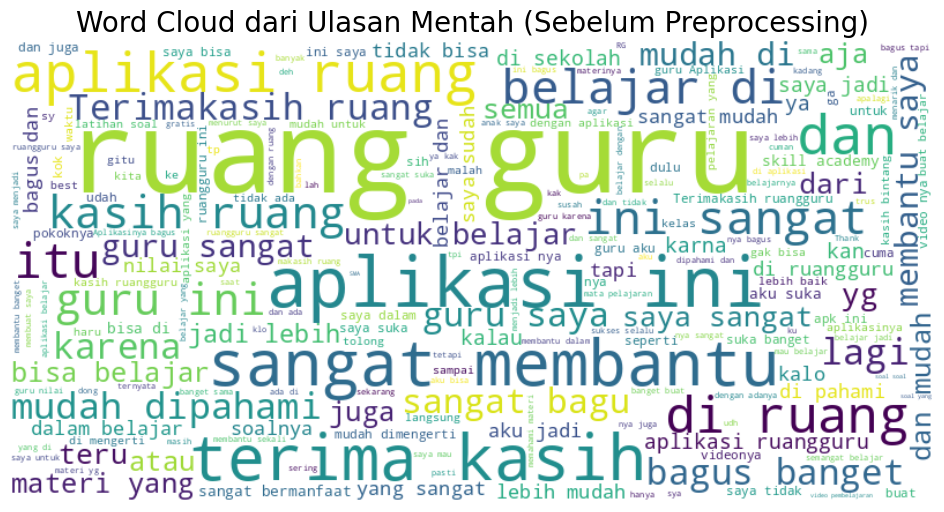

In [15]:
# Wordcloud content keseluruhan
all_text = " ".join(clean_df['content'].astype(str))

# WordCloud untuk keseluruhan
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(all_text)

# Menampilkan Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud dari Ulasan Mentah (Sebelum Preprocessing)", fontsize=20)
plt.show()

##Preprocessing

Dalam proses pembersihan dan pengolahan data teks, digunakan beberapa fungsi berikut:

1. **`cleaningText(text)`**: Membersihkan teks dari mention, hashtag, retweet (RT), tautan, angka, tanda baca, serta menghapus karakter newline dan spasi berlebih.

2. **`casefoldingText(text)`**: Mengubah seluruh teks menjadi huruf kecil agar konsisten dalam analisis.

3. **`tokenizingText(text)`**: Memecah teks menjadi potongan-potongan kata (token) agar lebih mudah diproses.

4. **`filteringText(text)`**: Menghapus kata-kata umum yang tidak membawa makna penting (stopwords), termasuk beberapa yang telah ditambahkan secara manual.

5. **`stemmingText(text)`**: Mengembalikan kata-kata ke bentuk dasarnya menggunakan library Sastrawi, khusus untuk bahasa Indonesia.

6. **`toSentence(list_words)`**: Menggabungkan kembali daftar kata hasil pemrosesan menjadi satu kalimat utuh.


In [16]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
    text = re.sub(r'RT[\s]', '', text) # remove RT
    text = re.sub(r"http\S+", '', text) # remove link
    text = re.sub(r'[0-9]+', '', text) # remove numbers
    text = re.sub(r'[^\w\s]', '', text) # remove numbers


    text = text.replace('\n', ' ') # replace new line into space
    text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
    text = text.strip(' ') # remove characters space from both left and right text
    return text

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower()
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text)
    return text

def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

    return stemmed_text
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

In [17]:
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal", "plisss": "tolong", "bgttt": "banget", "indo": "indonesia", "bgtt": "banget", "ad": "ada", "rv": "redvelvet", "plis": "tolong", "pls": "tolong", "cr": "sumber", "cod": "bayar ditempat", "adlh": "adalah", "afaik": "as far as i know", "ahaha": "haha", "aj": "saja", "ajep-ajep": "dunia gemerlap", "ak": "saya", "akika": "aku", "akkoh": "aku", "akuwh": "aku", "alay": "norak", "alow": "halo", "ambilin": "ambilkan", "ancur": "hancur", "anjrit": "anjing", "anter": "antar", "ap2": "apa-apa", "apasih": "apa sih", "apes": "sial", "aps": "apa", "aq": "saya", "aquwh": "aku", "asbun": "asal bunyi", "aseekk": "asyik", "asekk": "asyik", "asem": "asam", "aspal": "asli tetapi palsu", "astul": "asal tulis", "ato": "atau", "au ah": "tidak mau tahu", "awak": "saya", "ay": "sayang", "ayank": "sayang", "b4": "sebelum", "bakalan": "akan", "bandes": "bantuan desa", "bangedh": "banget", "banpol": "bantuan polisi", "banpur": "bantuan tempur", "basbang": "basi", "bcanda": "bercanda", "bdg": "bandung", "begajulan": "nakal", "beliin": "belikan", "bencong": "banci", "bentar": "sebentar", "ber3": "bertiga", "beresin": "membereskan", "bete": "bosan", "beud": "banget", "bg": "abang", "bgmn": "bagaimana", "bgt": "banget", "bijimane": "bagaimana", "bintal": "bimbingan mental", "bkl": "akan", "bknnya": "bukannya", "blegug": "bodoh", "blh": "boleh", "bln": "bulan", "blum": "belum", "bnci": "benci", "bnran": "yang benar", "bodor": "lucu", "bokap": "ayah", "boker": "buang air besar", "bokis": "bohong", "boljug": "boleh juga", "bonek": "bocah nekat", "boyeh": "boleh", "br": "baru", "brg": "bareng", "bro": "saudara laki-laki", "bru": "baru", "bs": "bisa", "bsen": "bosan", "bt": "buat", "btw": "ngomong-ngomong", "buaya": "tidak setia", "bubbu": "tidur", "bubu": "tidur", "bumil": "ibu hamil", "bw": "bawa", "bwt": "buat", "byk": "banyak", "byrin": "bayarkan", "cabal": "sabar", "cadas": "keren", "calo": "makelar", "can": "belum", "capcus": "pergi", "caper": "cari perhatian", "ce": "cewek", "cekal": "cegah tangkal", "cemen": "penakut", "cengengesan": "tertawa", "cepet": "cepat", "cew": "cewek", "chuyunk": "sayang", "cimeng": "ganja", "cipika cipiki": "cium pipi kanan cium pipi kiri", "ciyh": "sih", "ckepp": "cakep", "ckp": "cakep", "cmiiw": "correct me if i'm wrong", "cmpur": "campur", "cong": "banci", "conlok": "cinta lokasi", "cowwyy": "maaf", "cp": "siapa", "cpe": "capek", "cppe": "capek", "cucok": "cocok", "cuex": "cuek", "cumi": "Cuma miscall", "cups": "culun", "curanmor": "pencurian kendaraan bermotor", "curcol": "curahan hati colongan", "cwek": "cewek", "cyin": "cinta", "d": "di", "dah": "deh", "dapet": "dapat", "de": "adik", "dek": "adik", "demen": "suka", "deyh": "deh", "dgn": "dengan", "diancurin": "dihancurkan", "dimaafin": "dimaafkan", "dimintak": "diminta", "disono": "di sana", "dket": "dekat", "dkk": "dan kawan-kawan", "dll": "dan lain-lain", "dlu": "dulu", "dngn": "dengan", "dodol": "bodoh", "doku": "uang", "dongs": "dong", "dpt": "dapat", "dri": "dari", "drmn": "darimana", "drtd": "dari tadi", "dst": "dan seterusnya", "dtg": "datang", "duh": "aduh", "duren": "durian", "ed": "edisi", "egp": "emang gue pikirin", "eke": "aku", "elu": "kamu", "emangnya": "memangnya", "emng": "memang", "endak": "tidak", "enggak": "tidak", "envy": "iri", "ex": "mantan", "fax": "facsimile", "fifo": "first in first out", "folbek": "follow back", "fyi": "sebagai informasi", "gaada": "tidak ada uang", "gag": "tidak", "gaje": "tidak jelas", "gak papa": "tidak apa-apa", "gan": "juragan", "gaptek": "gagap teknologi", "gatek": "gagap teknologi", "gawe": "kerja", "gbs": "tidak bisa", "gebetan": "orang yang disuka", "geje": "tidak jelas", "gepeng": "gelandangan dan pengemis", "ghiy": "lagi", "gile": "gila", "gimana": "bagaimana", "gino": "gigi nongol", "githu": "gitu", "gj": "tidak jelas", "gmana": "bagaimana", "gn": "begini", "goblok": "bodoh", "golput": "golongan putih", "gowes": "mengayuh sepeda", "gpny": "tidak punya", "gr": "gede rasa", "gretongan": "gratisan", "gtau": "tidak tahu", "gua": "saya", "guoblok": "goblok", "gw": "saya", "ha": "tertawa", "haha": "tertawa", "hallow": "halo", "hankam": "pertahanan dan keamanan", "hehe": "he", "helo": "halo", "hey": "hai", "hlm": "halaman", "hny": "hanya", "hoax": "isu bohong", "hr": "hari", "hrus": "harus", "hubdar": "perhubungan darat", "huff": "mengeluh", "hum": "rumah", "humz": "rumah", "ilang": "hilang", "ilfil": "tidak suka", "imho": "in my humble opinion", "imoetz": "imut", "item": "hitam", "itungan": "hitungan", "iye": "iya", "ja": "saja", "jadiin": "jadi", "jaim": "jaga image", "jayus": "tidak lucu", "jdi": "jadi", "jem": "jam", "jga": "juga", "jgnkan": "jangankan", "jir": "anjing", "jln": "jalan", "jomblo": "tidak punya pacar", "jubir": "juru bicara", "jutek": "galak", "k": "ke", "kab": "kabupaten", "kabor": "kabur", "kacrut": "kacau", "kadiv": "kepala divisi", "kagak": "tidak", "kalo": "kalau", "kampret": "sialan", "kamtibmas": "keamanan dan ketertiban masyarakat", "kamuwh": "kamu", "kanwil": "kantor wilayah", "karna": "karena", "kasubbag": "kepala subbagian", "katrok": "kampungan", "kayanya": "kayaknya", "kbr": "kabar", "kdu": "harus", "kec": "kecamatan", "kejurnas": "kejuaraan nasional", "kekeuh": "keras kepala", "kel": "kelurahan", "kemaren": "kemarin", "kepengen": "mau", "kepingin": "mau", "kepsek": "kepala sekolah", "kesbang": "kesatuan bangsa", "kesra": "kesejahteraan rakyat", "ketrima": "diterima", "kgiatan": "kegiatan", "kibul": "bohong", "kimpoi": "kawin", "kl": "kalau", "klianz": "kalian", "kloter": "kelompok terbang", "klw": "kalau", "km": "kamu", "kmps": "kampus", "kmrn": "kemarin", "knal": "kenal", "knp": "kenapa", "kodya": "kota madya", "komdis": "komisi disiplin", "komsov": "komunis sovyet", "kongkow": "kumpul bareng teman-teman", "kopdar": "kopi darat", "korup": "korupsi", "kpn": "kapan", "krenz": "keren", "krm": "kirim", "kt": "kita", "ktmu": "ketemu", "ktr": "kantor", "kuper": "kurang pergaulan", "kw": "imitasi", "kyk": "seperti", "la": "lah", "lam": "salam", "lamp": "lampiran", "lanud": "landasan udara", "latgab": "latihan gabungan", "lebay": "berlebihan", "leh": "boleh", "lelet": "lambat", "lemot": "lambat", "lgi": "lagi", "lgsg": "langsung", "liat": "lihat", "litbang": "penelitian dan pengembangan", "lmyn": "lumayan", "lo": "kamu", "loe": "kamu", "lola": "lambat berfikir", "louph": "cinta", "low": "kalau", "lp": "lupa", "luber": "langsung, umum, bebas, dan rahasia", "luchuw": "lucu", "lum": "belum", "luthu": "lucu", "lwn": "lawan", "maacih": "terima kasih", "mabal": "bolos", "macem": "macam", "macih": "masih", "maem": "makan", "magabut": "makan gaji buta", "maho": "homo", "mak jang": "kaget", "maksain": "memaksa", "malem": "malam", "mam": "makan", "maneh": "kamu", "maniez": "manis", "mao": "mau", "masukin": "masukkan", "melu": "ikut", "mepet": "dekat sekali", "mgu": "minggu", "migas": "minyak dan gas bumi", "mikol": "minuman beralkohol", "miras": "minuman keras", "mlah": "malah", "mngkn": "mungkin", "mo": "mau", "mokad": "mati", "moso": "masa", "mpe": "sampai", "msk": "masuk", "mslh": "masalah", "mt": "makan teman", "mubes": "musyawarah besar", "mulu": "melulu", "mumpung": "selagi", "munas": "musyawarah nasional", "muntaber": "muntah dan berak", "musti": "mesti", "muupz": "maaf", "mw": "now watching", "n": "dan", "nanam": "menanam", "nanya": "bertanya", "napa": "kenapa", "napi": "narapidana", "napza": "narkotika, alkohol, psikotropika, dan zat adiktif ", "narkoba": "narkotika, psikotropika, dan obat terlarang", "nasgor": "nasi goreng", "nda": "tidak", "ndiri": "sendiri", "ne": "ini", "nekolin": "neokolonialisme", "nembak": "menyatakan cinta", "ngabuburit": "menunggu berbuka puasa", "ngaku": "mengaku", "ngambil": "mengambil", "nganggur": "tidak punya pekerjaan", "ngapah": "kenapa", "ngaret": "terlambat", "ngasih": "memberikan", "ngebandel": "berbuat bandel", "ngegosip": "bergosip", "ngeklaim": "mengklaim", "ngeksis": "menjadi eksis", "ngeles": "berkilah", "ngelidur": "menggigau", "ngerampok": "merampok", "ngga": "tidak", "ngibul": "berbohong", "ngiler": "mau", "ngiri": "iri", "ngisiin": "mengisikan", "ngmng": "bicara", "ngomong": "bicara", "ngubek2": "mencari-cari", "ngurus": "mengurus", "nie": "ini", "nih": "ini", "niyh": "nih", "nmr": "nomor", "nntn": "nonton", "nobar": "nonton bareng", "np": "now playing", "ntar": "nanti", "ntn": "nonton", "numpuk": "bertumpuk", "nutupin": "menutupi", "nyari": "mencari", "nyekar": "menyekar", "nyicil": "mencicil", "nyoblos": "mencoblos", "nyokap": "ibu", "ogah": "tidak mau", "ol": "online", "ongkir": "ongkos kirim", "oot": "out of topic", "org2": "orang-orang", "ortu": "orang tua", "otda": "otonomi daerah", "otw": "on the way, sedang di jalan", "pacal": "pacar", "pake": "pakai", "pala": "kepala", "pansus": "panitia khusus", "parpol": "partai politik", "pasutri": "pasangan suami istri", "pd": "pada", "pede": "percaya diri", "pelatnas": "pemusatan latihan nasional", "pemda": "pemerintah daerah", "pemkot": "pemerintah kota", "pemred": "pemimpin redaksi", "penjas": "pendidikan jasmani", "perda": "peraturan daerah", "perhatiin": "perhatikan", "pesenan": "pesanan", "pgang": "pegang", "pi": "tapi", "pilkada": "pemilihan kepala daerah", "pisan": "sangat", "pk": "penjahat kelamin", "plg": "paling", "pmrnth": "pemerintah", "polantas": "polisi lalu lintas", "ponpes": "pondok pesantren", "pp": "pulang pergi", "prg": "pergi", "prnh": "pernah", "psen": "pesan", "pst": "pasti", "pswt": "pesawat", "pw": "posisi nyaman", "qmu": "kamu", "rakor": "rapat koordinasi", "ranmor": "kendaraan bermotor", "re": "reply", "ref": "referensi", "rehab": "rehabilitasi", "rempong": "sulit", "repp": "balas", "restik": "reserse narkotika", "rhs": "rahasia", "rmh": "rumah", "ru": "baru", "ruko": "rumah toko", "rusunawa": "rumah susun sewa", "ruz": "terus", "saia": "saya", "salting": "salah tingkah", "sampe": "sampai", "samsek": "sama sekali", "sapose": "siapa", "satpam": "satuan pengamanan", "sbb": "sebagai berikut", "sbh": "sebuah", "sbnrny": "sebenarnya", "scr": "secara", "sdgkn": "sedangkan", "sdkt": "sedikit", "se7": "setuju", "sebelas dua belas": "mirip", "sembako": "sembilan bahan pokok", "sempet": "sempat", "sendratari": "seni drama tari", "sgt": "sangat", "shg": "sehingga", "siech": "sih", "sikon": "situasi dan kondisi", "sinetron": "sinema elektronik", "siramin": "siramkan", "sj": "saja", "skalian": "sekalian", "sklh": "sekolah", "skt": "sakit", "slesai": "selesai", "sll": "selalu", "slma": "selama", "slsai": "selesai", "smpt": "sempat", "smw": "semua", "sndiri": "sendiri", "soljum": "sholat jumat", "songong": "sombong", "sory": "maaf", "sosek": "sosial-ekonomi", "sotoy": "sok tahu", "spa": "siapa", "sppa": "siapa", "spt": "seperti", "srtfkt": "sertifikat", "stiap": "setiap", "stlh": "setelah", "suk": "masuk", "sumpek": "sempit", "syg": "sayang", "t4": "tempat", "tajir": "kaya", "tau": "tahu", "taw": "tahu", "td": "tadi", "tdk": "tidak", "teh": "kakak perempuan", "telat": "terlambat", "telmi": "telat berpikir", "temen": "teman", "tengil": "menyebalkan", "tepar": "terkapar", "tggu": "tunggu", "tgu": "tunggu", "thankz": "terima kasih", "thn": "tahun", "tilang": "bukti pelanggaran", "tipiwan": "TvOne", "tks": "terima kasih", "tlp": "telepon", "tls": "tulis", "tmbah": "tambah", "tmen2": "teman-teman", "tmpah": "tumpah", "tmpt": "tempat", "tngu": "tunggu", "tnyta": "ternyata", "tokai": "tai", "toserba": "toko serba ada", "tpi": "tapi", "trdhulu": "terdahulu", "trima": "terima kasih", "trm": "terima", "trs": "terus", "trutama": "terutama", "ts": "penulis", "tst": "tahu sama tahu", "ttg": "tentang", "tuch": "tuh", "tuir": "tua", "tw": "tahu", "u": "kamu", "ud": "sudah", "udah": "sudah", "ujg": "ujung", "ul": "ulangan", "unyu": "lucu", "uplot": "unggah", "urang": "saya", "usah": "perlu", "utk": "untuk", "valas": "valuta asing", "w/": "dengan", "wadir": "wakil direktur", "wamil": "wajib militer", "warkop": "warung kopi", "warteg": "warung tegal", "wat": "buat", "wkt": "waktu", "wtf": "what the fuck", "xixixi": "tertawa", "ya": "iya", "yap": "iya", "yaudah": "ya sudah", "yawdah": "ya sudah", "yg": "yang", "yl": "yang lain", "yo": "iya", "yowes": "ya sudah", "yup": "iya", "7an": "tujuan", "ababil": "abg labil", "acc": "accord", "adlah": "adalah", "adoh": "aduh", "aha": "tertawa", "aing": "saya", "aja": "saja", "ajj": "saja", "aka": "dikenal juga sebagai", "akko": "aku", "akku": "aku", "akyu": "aku", "aljasa": "asal jadi saja", "ama": "sama", "ambl": "ambil", "anjir": "anjing", "ank": "anak", "ap": "apa", "apaan": "apa", "ape": "apa", "aplot": "unggah", "apva": "apa", "aqu": "aku", "asap": "sesegera mungkin", "aseek": "asyik", "asek": "asyik", "aseknya": "asyiknya", "asoy": "asyik", "astrojim": "astagfirullahaladzim", "ath": "kalau begitu", "atuh": "kalau begitu", "ava": "avatar", "aws": "awas", "ayang": "sayang", "ayok": "ayo", "bacot": "banyak bicara", "bales": "balas", "bangdes": "pembangunan desa", "bangkotan": "tua", "banpres": "bantuan presiden", "bansarkas": "bantuan sarana kesehatan", "bazis": "badan amal, zakat, infak, dan sedekah", "bcoz": "karena", "beb": "sayang", "bejibun": "banyak", "belom": "belum", "bener": "benar", "ber2": "berdua", "berdikari": "berdiri di atas kaki sendiri", "bet": "banget", "beti": "beda tipis", "beut": "banget", "bgd": "banget", "bgs": "bagus", "bhubu": "tidur", "bimbuluh": "bimbingan dan penyuluhan", "bisi": "kalau-kalau", "bkn": "bukan", "bl": "beli", "blg": "bilang", "blm": "belum", "bls": "balas", "bnchi": "benci", "bngung": "bingung", "bnyk": "banyak", "bohay": "badan aduhai", "bokep": "porno", "bokin": "pacar", "bole": "boleh", "bolot": "bodoh", "bonyok": "ayah ibu", "bpk": "bapak", "brb": "segera kembali", "brngkt": "berangkat", "brp": "berapa", "brur": "saudara laki-laki", "bsa": "bisa", "bsk": "besok", "bu_bu": "tidur", "bubarin": "bubarkan", "buber": "buka bersama", "bujubune": "luar biasa", "buser": "buru sergap", "bwhn": "bawahan", "byar": "bayar", "byr": "bayar", "c8": "chat", "cabut": "pergi", "caem": "cakep", "cama-cama": "sama-sama", "cangcut": "celana dalam", "cape": "capek", "caur": "jelek", "cekak": "tidak ada uang", "cekidot": "coba lihat", "cemplungin": "cemplungkan", "ceper": "pendek", "ceu": "kakak perempuan", "cewe": "cewek", "cibuk": "sibuk", "cin": "cinta", "ciye": "cie", "ckck": "ck", "clbk": "cinta lama bersemi kembali", "cmpr": "campur", "cnenk": "senang", "congor": "mulut", "cow": "cowok", "coz": "karena", "cpa": "siapa", "gokil": "gila", "gombal": "suka merayu", "gpl": "tidak pakai lama", "gpp": "tidak apa-apa", "gretong": "gratis", "gt": "begitu", "gtw": "tidak tahu", "gue": "saya", "guys": "teman-teman", "gws": "cepat sembuh", "haghaghag": "tertawa", "hakhak": "tertawa", "handak": "bahan peledak", "hansip": "pertahanan sipil", "hellow": "halo", "helow": "halo", "hi": "hai", "hlng": "hilang", "hnya": "hanya", "houm": "rumah", "hrs": "harus", "hubad": "hubungan angkatan darat", "hubla": "perhubungan laut", "huft": "mengeluh", "humas": "hubungan masyarakat", "idk": "saya tidak tahu", "ilfeel": "tidak suka", "imba": "jago sekali", "imoet": "imut", "info": "informasi", "itung": "hitung", "isengin": "bercanda", "iyala": "iya lah", "iyo": "iya", "jablay": "jarang dibelai", "jadul": "jaman dulu", "jancuk": "anjing", "jd": "jadi", "jdikan": "jadikan", "jg": "juga", "jgn": "jangan", "jijay": "jijik", "jkt": "jakarta", "jnj": "janji", "jth": "jatuh", "jurdil": "jujur adil", "jwb": "jawab", "ka": "kakak", "kabag": "kepala bagian", "kacian": "kasihan", "kadit": "kepala direktorat", "kaga": "tidak", "kaka": "kakak", "kamtib": "keamanan dan ketertiban", "kamuh": "kamu", "kamyu": "kamu", "kapt": "kapten", "kasat": "kepala satuan", "kasubbid": "kepala subbidang", "kau": "kamu", "kbar": "kabar", "kcian": "kasihan", "keburu": "terlanjur", "kedubes": "kedutaan besar", "kek": "seperti", "keknya": "kayaknya", "keliatan": "kelihatan", "keneh": "masih", "kepikiran": "terpikirkan", "kepo": "mau tahu urusan orang", "kere": "tidak punya uang", "kesian": "kasihan", "ketauan": "ketahuan", "keukeuh": "keras kepala", "khan": "kan", "kibus": "kaki busuk", "kk": "kakak", "klian": "kalian", "klo": "kalau", "kluarga": "keluarga", "klwrga": "keluarga", "kmari": "kemari", "kmpus": "kampus", "kn": "kan", "knl": "kenal", "knpa": "kenapa", "kog": "kok", "kompi": "komputer", "komtiong": "komunis Tiongkok", "konjen": "konsulat jenderal", "koq": "kok", "kpd": "kepada", "kptsan": "keputusan", "krik": "garing", "krn": "karena", "ktauan": "ketahuan", "ktny": "katanya", "kudu": "harus", "kuq": "kok", "ky": "seperti", "kykny": "kayanya", "laka": "kecelakaan", "lambreta": "lambat", "lansia": "lanjut usia", "lapas": "lembaga pemasyarakatan", "lbur": "libur", "lekong": "laki-laki", "lg": "lagi", "lgkp": "lengkap", "lht": "lihat", "linmas": "perlindungan masyarakat", "lmyan": "lumayan", "lngkp": "lengkap", "loch": "loh", "lol": "tertawa", "lom": "belum", "loupz": "cinta", "lowh": "kamu", "lu": "kamu", "luchu": "lucu", "luff": "cinta", "luph": "cinta", "lw": "kamu", "lwt": "lewat", "maaciw": "terima kasih", "mabes": "markas besar", "macem-macem": "macam-macam", "madesu": "masa depan suram", "maen": "main", "mahatma": "maju sehat bersama", "mak": "ibu", "makasih": "terima kasih", "malah": "bahkan", "malu2in": "memalukan", "mamz": "makan", "manies": "manis", "mantep": "mantap", "markus": "makelar kasus", "mba": "mbak", "mending": "lebih baik", "mgkn": "mungkin", "mhn": "mohon", "miker": "minuman keras", "milis": "mailing list", "mksd": "maksud", "mls": "malas", "mnt": "minta", "moge": "motor gede", "mokat": "mati", "mosok": "masa", "msh": "masih", "mskpn": "meskipun", "msng2": "masing-masing", "muahal": "mahal", "muker": "musyawarah kerja", "mumet": "pusing", "muna": "munafik", "munaslub": "musyawarah nasional luar biasa", "musda": "musyawarah daerah", "muup": "maaf", "muuv": "maaf", "nal": "kenal", "nangis": "menangis", "naon": "apa", "napol": "narapidana politik", "naq": "anak", "narsis": "bangga pada diri sendiri", "nax": "anak", "ndak": "tidak", "ndut": "gendut", "nekolim": "neokolonialisme", "nelfon": "menelepon", "ngabis2in": "menghabiskan", "ngakak": "tertawa", "ngambek": "marah", "ngampus": "pergi ke kampus", "ngantri": "mengantri", "ngapain": "sedang apa", "ngaruh": "berpengaruh", "ngawur": "berbicara sembarangan", "ngeceng": "kumpul bareng-bareng", "ngeh": "sadar", "ngekos": "tinggal di kos", "ngelamar": "melamar", "ngeliat": "melihat", "ngemeng": "bicara terus-terusan", "ngerti": "mengerti", "nggak": "tidak", "ngikut": "ikut", "nginep": "menginap", "ngisi": "mengisi", "ngmg": "bicara", "ngocol": "lucu", "ngomongin": "membicarakan", "ngumpul": "berkumpul", "ni": "ini", "nyasar": "tersesat", "nyariin": "mencari", "nyiapin": "mempersiapkan", "nyiram": "menyiram", "nyok": "ayo", "o/": "oleh", "ok": "ok", "priksa": "periksa", "pro": "profesional", "psn": "pesan", "psti": "pasti", "puanas": "panas", "qmo": "kamu", "qt": "kita", "rame": "ramai", "raskin": "rakyat miskin", "red": "redaksi", "reg": "register", "rejeki": "rezeki", "renstra": "rencana strategis", "reskrim": "reserse kriminal", "sni": "sini", "somse": "sombong sekali", "sorry": "maaf", "sosbud": "sosial-budaya", "sospol": "sosial-politik", "sowry": "maaf", "spd": "sepeda", "sprti": "seperti", "spy": "supaya", "stelah": "setelah", "subbag": "subbagian", "sumbangin": "sumbangkan", "sy": "saya", "syp": "siapa", "tabanas": "tabungan pembangunan nasional", "tar": "nanti", "taun": "tahun", "tawh": "tahu", "tdi": "tadi", "te2p": "tetap", "tekor": "rugi", "telkom": "telekomunikasi", "telp": "telepon", "temen2": "teman-teman", "tengok": "menjenguk", "terbitin": "terbitkan", "tgl": "tanggal", "thanks": "terima kasih", "thd": "terhadap", "thx": "terima kasih", "tipi": "TV", "tkg": "tukang", "tll": "terlalu", "tlpn": "telepon", "tman": "teman", "tmbh": "tambah", "tmn2": "teman-teman", "tmph": "tumpah", "tnda": "tanda", "tnh": "tanah", "togel": "toto gelap", "tp": "tapi", "tq": "terima kasih", "trgntg": "tergantung", "trims": "terima kasih", "cb": "coba", "y": "ya", "munfik": "munafik", "reklamuk": "reklamasi", "sma": "sama", "tren": "trend", "ngehe": "kesal", "mz": "mas", "analisise": "analisis", "sadaar": "sadar", "sept": "september", "nmenarik": "menarik", "zonk": "bodoh", "rights": "benar", "simiskin": "miskin", "ngumpet": "sembunyi", "hardcore": "keras", "akhirx": "akhirnya", "solve": "solusi", "watuk": "batuk", "ngebully": "intimidasi", "masy": "masyarakat", "still": "masih", "tauk": "tahu", "mbual": "bual", "tioghoa": "tionghoa", "ngentotin": "senggama", "kentot": "senggama", "faktakta": "fakta", "sohib": "teman", "rubahnn": "rubah", "trlalu": "terlalu", "nyela": "cela", "heters": "pembenci", "nyembah": "sembah", "most": "paling", "ikon": "lambang", "light": "terang", "pndukung": "pendukung", "setting": "atur", "seting": "akting", "next": "lanjut", "waspadalah": "waspada", "gantengsaya": "ganteng", "parte": "partai", "nyerang": "serang", "nipu": "tipu", "ktipu": "tipu", "jentelmen": "berani", "buangbuang": "buang", "tsangka": "tersangka", "kurng": "kurang", "ista": "nista", "less": "kurang", "koar": "teriak", "paranoid": "takut", "problem": "masalah", "tahi": "kotoran", "tirani": "tiran", "tilep": "tilap", "happy": "bahagia", "tak": "tidak", "penertiban": "tertib", "uasai": "kuasa", "mnolak": "tolak", "trending": "trend", "taik": "tahi", "wkwkkw": "tertawa", "ahokncc": "ahok", "istaa": "nista", "benarjujur": "jujur", "mgkin": "mungkin"}
def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
clean_df['text_clean'] = clean_df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
clean_df['text_casefoldingText'] = clean_df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
clean_df['text_slangwords'] = clean_df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
clean_df['text_tokenizingText'] = clean_df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
clean_df['text_stopword'] = clean_df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
clean_df['text_akhir'] = clean_df['text_stopword'].apply(toSentence)

##Pelabelan

In [19]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

In [20]:
# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya ke dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")


In [23]:
# Fungsi untuk menentukan polaritas sentimen dari berdasarkan komentar
def sentiment_analysis_lexicon_indonesia(text):

    score = 0
    for word in text:

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score >= 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif

    return score, polarity

In [24]:
results = clean_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
clean_df['polarity_score'] = results[0]
clean_df['polarity'] = results[1]
print(clean_df['polarity'].value_counts())

polarity
positive    11772
negative     4734
Name: count, dtype: int64


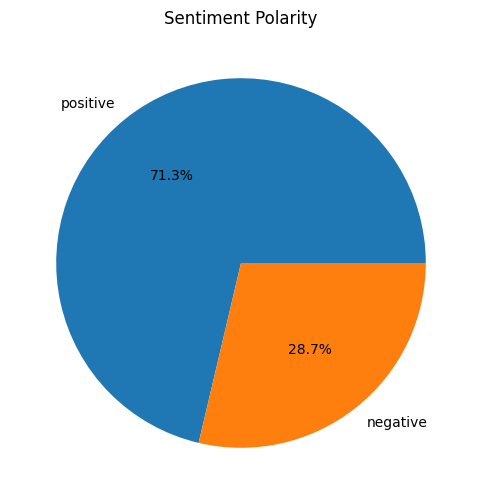

In [25]:
# Hitung jumlah masing-masing polaritas
counts = clean_df['polarity'].value_counts()

# Pie chart sederhana
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Sentiment Polarity')
plt.show()

In [26]:
# Membuat tabel ulasan positif
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)
positive_tweets = clean_df[clean_df['polarity'] == 'positive']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'positive_tweets'.
positive_tweets = positive_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
positive_tweets = positive_tweets.sort_values(by='polarity_score', ascending=False)
positive_tweets = positive_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
positive_tweets.index += 1
positive_tweets.head()

,text_akhir,polarity_score,polarity,text_stopword
1,aplikasi penyedia jasa bidang pendidikan terbaik memudahkan pelajar menimba ilmu memudahkan mencapai nilai terbaik tertinggi unusbnataupun lulus sbmptn siswa smk kelas mengambil paket membantu perisapan unbk video pembelajaran pembahasan mudah dipahami efektif belajar dimana harga terjangkau dibandingkan bimbel,55,positive,"[aplikasi, penyedia, jasa, bidang, pendidikan, terbaik, memudahkan, pelajar, menimba, ilmu, memudahkan, mencapai, nilai, terbaik, tertinggi, unusbnataupun, lulus, sbmptn, siswa, smk, kelas, mengambil, paket, membantu, perisapan, unbk, video, pembelajaran, pembahasan, mudah, dipahami, efektif, belajar, dimana, harga, terjangkau, dibandingkan, bimbel]"
2,ruangguru membantu belajar berlangganan ruangguru sangatt menyenangkan memudahkan belajar pulang pergi bimbel belajar ruangbelajar bermanfaat banget besoknya pelajarannya malemnya nonton video pembelajarannya guru menambah nilai disaat pelajaran disekolah dimengerti gampang banget ruangguru ruanglesonline tinggal beli koin langsung deh konsul tutortutor bikin mengerti dikelas berlangganan banyaakkk banget berlangganan mantapkan ayo berlangganan tunggu berlangganan pakai kode diskon ummiozdyrf yaaa diskon,46,positive,"[ruangguru, membantu, belajar, berlangganan, ruangguru, sangatt, menyenangkan, memudahkan, belajar, pulang, pergi, bimbel, belajar, ruangbelajar, bermanfaat, banget, besoknya, pelajarannya, malemnya, nonton, video, pembelajarannya, guru, menambah, nilai, disaat, pelajaran, disekolah, dimengerti, gampang, banget, ruangguru, ruanglesonline, tinggal, beli, koin, langsung, deh, konsul, tutortutor, bikin, mengerti, dikelas, berlangganan, banyaakkk, banget, berlangganan, mantapkan, ayo, berlangganan, tunggu, berlangganan, pakai, kode, diskon, ummiozdyrf, yaaa, diskon]"
3,terima kasih ruang guru pembelajaran mudah pahami menambah ilmu pengetahuan halhal aplikasi bagus siswa belajar rumah aplikasi belajar santai rumah pengajar berpengalaman ahli sarankan aplikasi bermanfaat menambah ilmu pengetahuan semoga aplikasi sukses berhasil,44,positive,"[terima, kasih, ruang, guru, pembelajaran, mudah, pahami, menambah, ilmu, pengetahuan, halhal, aplikasi, bagus, siswa, belajar, rumah, aplikasi, belajar, santai, rumah, pengajar, berpengalaman, ahli, sarankan, aplikasi, bermanfaat, menambah, ilmu, pengetahuan, semoga, aplikasi, sukses, berhasil]"
4,seneng banget belajar pakai ruang guru vidionya menarik pembahasan mudah dipahami alhamdulillah kesempatan salah squadnya ruang guru semoga ilmu dibagikan dipelajari bermanfaat keluarga ruang guru sukses tercapai dicitacitakan diridhoi dirohmati allah aamiin semangat selamat,44,positive,"[seneng, banget, belajar, pakai, ruang, guru, vidionya, menarik, pembahasan, mudah, dipahami, alhamdulillah, kesempatan, salah, squadnya, ruang, guru, semoga, ilmu, dibagikan, dipelajari, bermanfaat, keluarga, ruang, guru, sukses, tercapai, dicitacitakan, diridhoi, dirohmati, allah, aamiin, semangat, selamat]"
5,terimakasih ruang guru akun manfaat materi pembelajaran mudah dipahami detail video pembelajaran mengasyikkan dibimbing pakar profesional sehingaa belajar mudah dipahami menjadikan semangat menambah ilmu pengetahuan mengasah kemampuan mahir belajar,44,positive,"[terimakasih, ruang, guru, akun, manfaat, materi, pembelajaran, mudah, dipahami, detail, video, pembelajaran, mengasyikkan, dibimbing, pakar, profesional, sehingaa, belajar, mudah, dipahami, menjadikan, semangat, menambah, ilmu, pengetahuan, mengasah, kemampuan, mahir, belajar]"


In [27]:
# Membuat tabel ulasan negatif
# Mengatur opsi tampilan Pandas agar kolom dapat menampilkan teks hingga 3000 karakter.
pd.set_option('display.max_colwidth', 3000)
negative_tweets = clean_df[clean_df['polarity'] == 'negative']

# Memilih hanya kolom-kolom tertentu dari DataFrame 'negative_tweets'.
negative_tweets = negative_tweets[['text_akhir', 'polarity_score', 'polarity','text_stopword']]
negative_tweets = negative_tweets.sort_values(by='polarity_score', ascending=True)

# Memilih 10 baris pertama dan mengatur ulang indeks dari DataFrame yang sudah diurutkan.
negative_tweets = negative_tweets[0:10]
negative_tweets = negative_tweets.reset_index(drop=True)

# Menambahkan 1 ke semua indeks DataFrame.
negative_tweets.index += 1
negative_tweets.head()

,text_akhir,polarity_score,polarity,text_stopword
1,aplikasi ruang guru membantu anak belajar orang tua menyayangkan aplikasi misi ruang guru si anak mudah menyelesaikan misi anak tsb sasaran misi jalankan anak kelas misi aplikasi tsb misi cepat selesai anak kelas tsb membuka video kelas atasnya misi selesai kelas tlng perbaiki,-41,negative,"[aplikasi, ruang, guru, membantu, anak, belajar, orang, tua, menyayangkan, aplikasi, misi, ruang, guru, si, anak, mudah, menyelesaikan, misi, anak, tsb, sasaran, misi, jalankan, anak, kelas, misi, aplikasi, tsb, misi, cepat, selesai, anak, kelas, tsb, membuka, video, kelas, atasnya, misi, selesai, kelas, tlng, perbaiki]"
2,jelekk banget aplikasi harap tertipu aplikasi udh downdlod main aplikasi ruang guru masuk galeri fotovideo hapus cri gk ketemu fotovideo hapus permanen gara aplikasi downdlod menyesal harap aplikasi bertanggung ganti rugi terima sedih kehilangan foto foto keluarga benci,-37,negative,"[jelekk, banget, aplikasi, harap, tertipu, aplikasi, udh, downdlod, main, aplikasi, ruang, guru, masuk, galeri, fotovideo, hapus, cri, gk, ketemu, fotovideo, hapus, permanen, gara, aplikasi, downdlod, menyesal, harap, aplikasi, bertanggung, ganti, rugi, terima, sedih, kehilangan, foto, foto, keluarga, benci]"
3,boros makek kuota data males memakan kuota banyaksaat pandemi covid butuh kuota data tugas sekolahan,-36,negative,"[boros, makek, kuota, data, males, memakan, kuota, banyaksaat, pandemi, covid, butuh, kuota, data, tugas, sekolahan]"
4,boros kuota aplikasi download vidio materi kena gb bayar mahal mahal kuota boros boong vidio pembelajaran offline gitu rugi bayarnya uang bayarnya belikan kuota trus belajar youtube ulang vidio pembelajaran pakai kuota aahh kacau,-35,negative,"[boros, kuota, aplikasi, download, vidio, materi, kena, gb, bayar, mahal, mahal, kuota, boros, boong, vidio, pembelajaran, offline, gitu, rugi, bayarnya, uang, bayarnya, belikan, kuota, trus, belajar, youtube, ulang, vidio, pembelajaran, pakai, kuota, aahh, kacau]"
5,aplikasi ruang guru menariksaya user sengaja mencoba aplikasi ruang guru belajar bahasa arabsaya aplikasi ruang guru kelas ipaktsp bahasa arabeh aplikasi ruang guru komplit jenjang sdsmaternyata kurangmending pindah aplikasi lainmohon maaf yaasoalnya kecewa,-33,negative,"[aplikasi, ruang, guru, menariksaya, user, sengaja, mencoba, aplikasi, ruang, guru, belajar, bahasa, arabsaya, aplikasi, ruang, guru, kelas, ipaktsp, bahasa, arabeh, aplikasi, ruang, guru, komplit, jenjang, sdsmaternyata, kurangmending, pindah, aplikasi, lainmohon, maaf, yaasoalnya, kecewa]"


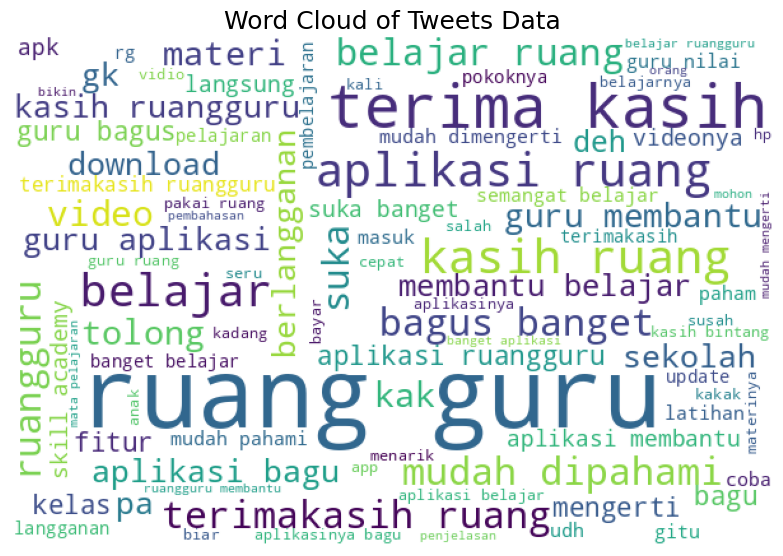

In [28]:
# Wordcloud dari kata yang sudah di bersihkan
list_words = ' '.join(word for tweet in clean_df['text_stopword'] for word in tweet)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

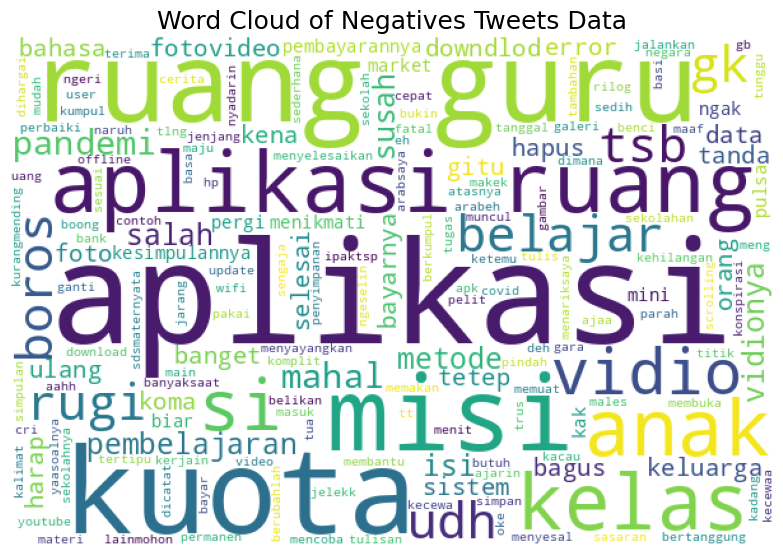

In [29]:
# Wordcloud dari kata kata negatif yang sudah di bersihkan
list_words = ' '.join(word for tweet in negative_tweets['text_stopword'] for word in tweet)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Negatives Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

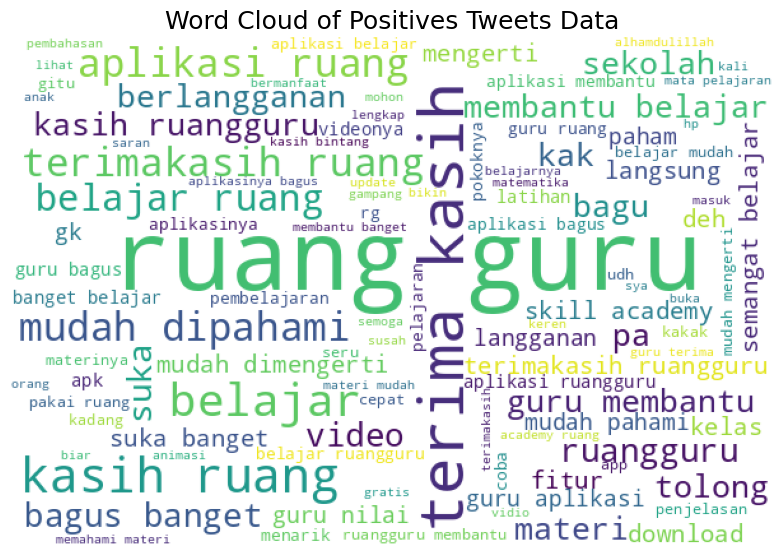

In [30]:
# Wordcloud dari kata kata positif yang sudah di bersihkan
list_words = ' '.join(word for tweet in positive_tweets['text_stopword'] for word in tweet)
wordcloud = WordCloud(width=600, height=400, background_color='white', min_font_size=10).generate(list_words)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title('Word Cloud of Positives Tweets Data', fontsize=18)

# Menonaktifkan grid pada sumbu.
ax.grid(False)

# Menampilkan word cloud dalam gambar.
ax.imshow((wordcloud))

# Mengatur layout gambar.
fig.tight_layout(pad=0)

# Menyembunyikan sumbu.
ax.axis('off')

# Menampilkan word cloud.
plt.show()

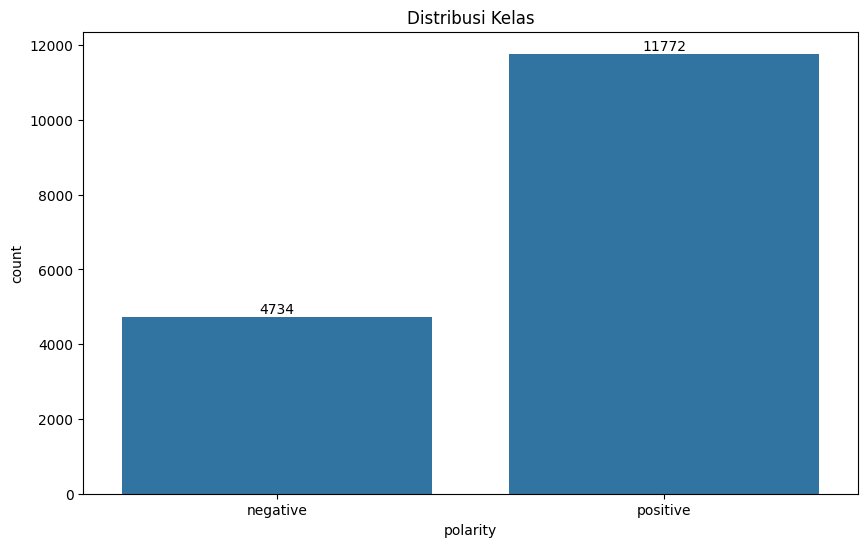

In [31]:
# Mengecek distribusi Kelas
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='polarity', data=clean_df)
plt.title('Distribusi Kelas')
ax.bar_label(ax.containers[0])
plt.show()

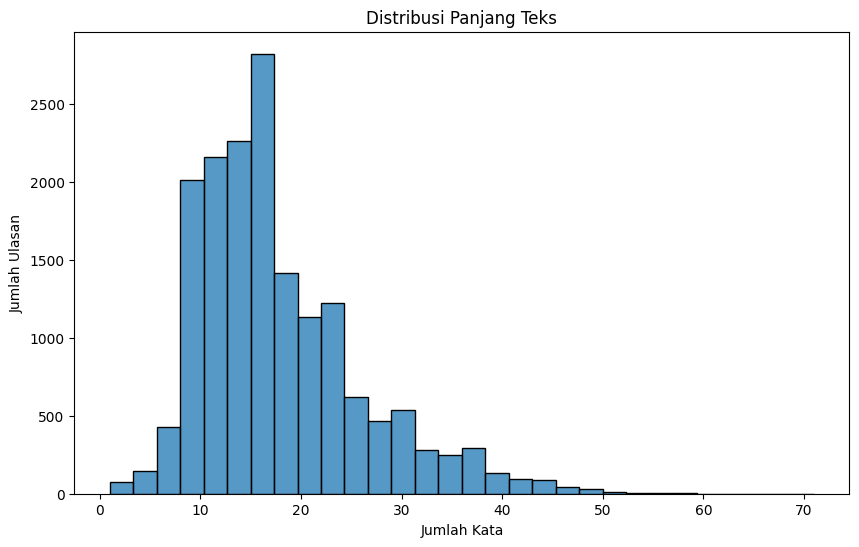

In [32]:
# Menampilkan distribusi panjang teks
clean_df['text_length'] = clean_df['text_akhir'].str.split().str.len()
plt.figure(figsize=(10, 6))
sns.histplot(clean_df['text_length'], bins=30)
plt.title('Distribusi Panjang Teks')
plt.xlabel('Jumlah Kata')
plt.ylabel('Jumlah Ulasan')
plt.show()

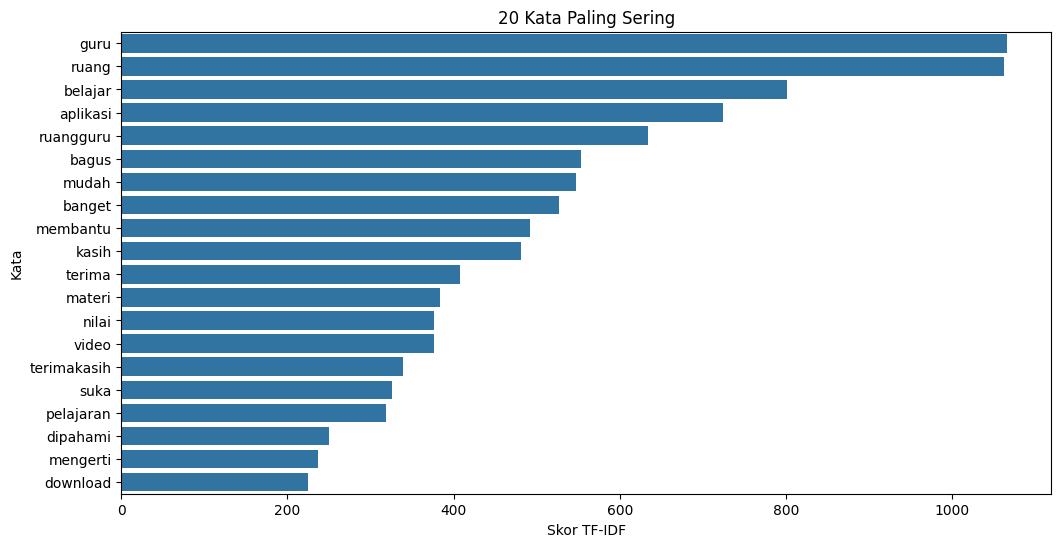

In [33]:
# Menampilkan 20 kata paling sering muncul
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(clean_df['text_akhir'])
tfidf_scores = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_words = tfidf_scores.sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_words.values, y=top_words.index)
plt.title('20 Kata Paling Sering')
plt.xlabel('Skor TF-IDF')
plt.ylabel('Kata')
plt.show()

## **Data Splitting**

In [34]:
# Memisahkan data menjadi fitur (tweet) dan label (sentimen)
X = clean_df['text_akhir']
y = clean_df['polarity']

In [35]:
# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8 )
X_tfidf = tfidf.fit_transform(X)

In [36]:
# Konversi hasil ekstraksi fitur menjadi dataframe
features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

# Menampilkan hasil ekstraksi fitur
features_df

,academy,alhamdulillah,anak,animasi,animasinya,apk,aplikasi,aplikasinya,app,asik,...,udh,ujian,ulang,ulangan,update,video,videonya,vidio,vidionya,yah
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.539756,0.242957,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.474578,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.420244,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16501,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.935504,0.000000,0.000000,0.0,0.0,0.0
16502,0.0,0.0,0.0,0.0,0.0,0.000000,0.480625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
16503,0.0,0.0,0.0,0.0,0.0,0.000000,0.119100,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0
16504,0.0,0.0,0.0,0.0,0.0,0.236295,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [37]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

## **Pemodelan**

In [38]:
# Model yang digunakan
models = {
    "Naive Bayes": BernoulliNB(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier()
}

# Membuat fungsi evaluasi model dan mengembalikan hasil dalam DataFrame
def evaluate_models(models, X_train, y_train, X_test, y_test):
    results = []

    for name, model in models.items():
        model.fit(X_train.toarray(), y_train)
        train_pred = model.predict(X_train.toarray())
        test_pred  = model.predict(X_test.toarray())

        acc_train = accuracy_score(y_train, train_pred)
        acc_test  = accuracy_score(y_test, test_pred)

        results.append({
            'Model': name,
            'Accuracy Train': acc_train,
            'Accuracy Test': acc_test
        })

    return pd.DataFrame(results)

In [39]:
# Menjalankan evaluasi dan disimpan hasilnya ke DataFrame
results_df = evaluate_models(models, X_train, y_train, X_test, y_test)

# Menampilkan akurasi test
accuracy_test_only = results_df[['Model', 'Accuracy Test']]
print(accuracy_test_only)

                 Model  Accuracy Test
0          Naive Bayes       0.778316
1        Random Forest       0.815566
2  Logistic Regression       0.867050
3        Decision Tree       0.740763


Dalam kasus Sentiment Analysis ini, algoritma Logistic Regresion mencapai akurasi tertinggi sebesar 86,70%. Oleh karena itu, algoritma Logistic Regression dipilih sebagai model utama yang akan digunakan untuk memprediksi sentimen pada kalimat-kalimat baru.

In [97]:
# Input kalimat baru dari pengguna
model = models["Logistic Regression"]
kalimat_baru = input("Masukkan kalimat baru: ")

# Melakukan preprocessing pada kalimat baru
kalimat_baru_cleaned = cleaningText(kalimat_baru)
kalimat_baru_casefolded = casefoldingText(kalimat_baru_cleaned)
kalimat_baru_slangfixed = fix_slangwords(kalimat_baru_casefolded)
kalimat_baru_tokenized = tokenizingText(kalimat_baru_slangfixed)
kalimat_baru_filtered = filteringText(kalimat_baru_tokenized)
kalimat_baru_final = toSentence(kalimat_baru_filtered)

# Menggunakan objek tfidf yang sudah di-fit dari pelatihan sebelumnya
X_kalimat_baru = tfidf.transform([kalimat_baru_final])

# Memperoleh prediksi sentimen kalimat baru
prediksi_sentimen = model.predict(X_kalimat_baru)

# Menampilkan hasil prediksi
if prediksi_sentimen[0] == 'positive':
    print("Sentimen kalimat baru adalah POSITIF.")
else:
    print("Sentimen kalimat baru adalah NEGATIF.")

Masukkan kalimat baru: Aplikasi berjalan lambar dan banyak bug
Sentimen kalimat baru adalah NEGATIF.
